In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip -q "/content/gdrive/My Drive/Sophomore/hw1.zip"

Mounted at /content/gdrive


In [2]:
cd hw1

/content/hw1


In [3]:
cd scripts

/content/hw1/scripts


In [35]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import io


for data_name in ["mnist", "spam", "cifar10"]:
  data = np.load(f"../data/{data_name}-data.npz")
  print("\nloaded %s data!" % data_name)
  fields = "test_data", "training_data", "training_labels"
  for field in fields:
    print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 57)
training_data (4172, 57)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


In [53]:
def shuffle_and_partition(data, labels, val_size):
  data_size = len(data)
  if val_size < 1.0:
    val_size = int(data_size * val_size)
  training_size = data_size - val_size
  np.random.seed(42)
  index_perm = np.random.permutation(data_size)
  train_index = index_perm[:training_size]
  val_index= index_perm[training_size:]
  train_pts = data[train_index]
  train_labels = labels[train_index]
  val_pts = data[val_index]
  val_labels = labels[val_index]

  return train_pts, train_labels, val_pts, val_labels


In [54]:
mnist = np.load(f"../data/mnist-data.npz")
spam = np.load(f"../data/spam-data.npz")
cifar10 = np.load(f"../data/cifar10-data.npz")
mnist

In [56]:
mnist_train_features, mnist_train_labels, mnist_val_features, mnist_val_labels = shuffle_and_partition(
    mnist["training_data"], mnist["training_labels"], 10000)

In [57]:
spam_train_features, spam_train_labels, spam_val_features, spam_val_labels = shuffle_and_partition(
    spam["training_data"], spam["training_labels"], 0.20)

In [58]:
cifar10_train_features, cifar10_train_labels, cifar10_val_features, cifar10_val_labels = shuffle_and_partition(
    cifar10["training_data"], cifar10["training_labels"], 5000)

In [41]:
from sklearn.metrics import accuracy_score


In [11]:
num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
training_accuracy = []
validation_accuracy = []
mnist_train_features_reshaped = mnist_train_features.reshape((-1, 28*28))
mnist_val_features_reshaped = mnist_val_features.reshape((-1, 28*28))
for num in num_samples:
  classifier = svm.SVC(kernel = "linear")
  classifier.fit(mnist_train_features[:num].reshape((-1, 28*28)), mnist_train_labels[:num])
  #predict labels for training set
  mnist_train_pred_labels = classifier.predict(mnist_train_features_reshaped[:num])
  train_score = accuracy_score(mnist_train_labels[:num], mnist_train_pred_labels)
  training_accuracy.append(train_score)
  #predict labels for validation set
  mnist_val_pred_labels = classifier.predict(mnist_val_features_reshaped)
  val_score = accuracy_score(mnist_val_labels, mnist_val_pred_labels)
  validation_accuracy.append(val_score)

training_accuracy
validation_accuracy

[0.7221, 0.8013, 0.8606, 0.8776, 0.897, 0.9126, 0.9216]

Text(0, 0.5, 'Accuracy')

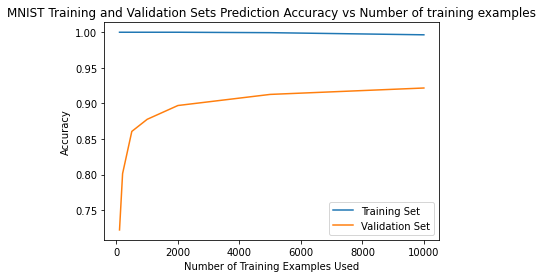

In [14]:
plt.figure()
plt.plot(num_samples, training_accuracy, label = "Training Set")
plt.plot(num_samples, validation_accuracy, label = "Validation Set")
plt.legend()
plt.title("MNIST Training and Validation Sets Prediction Accuracy vs Number of training examples")
plt.xlabel("Number of Training Examples Used")
plt.ylabel("Accuracy")

In [30]:
size_all = len(spam_train_features)
num_samples = [100, 200, 500, 1000, 2000, size_all]
training_accuracy = []
validation_accuracy = []

for num in num_samples:
  classifier = svm.SVC(kernel = "linear")
  classifier.fit(spam_train_features[:num], spam_train_labels[:num])
  #predict labels for training set
  spam_train_pred_labels = classifier.predict(spam_train_features[:num])
  train_score = accuracy_score(spam_train_labels[:num], spam_train_pred_labels)
  training_accuracy.append(train_score)
  #predict labels for validation set
  spam_val_pred_labels = classifier.predict(spam_val_features)
  val_score = accuracy_score(spam_val_labels, spam_val_pred_labels)
  validation_accuracy.append(val_score)

Text(0, 0.5, 'Accuracy')

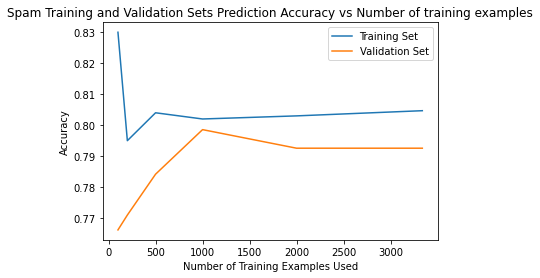

In [33]:
plt.figure()
plt.plot(num_samples, training_accuracy, label = "Training Set")
plt.plot(num_samples, validation_accuracy, label = "Validation Set")
plt.legend()
plt.title("Spam Training and Validation Sets Prediction Accuracy vs Number of training examples")
plt.xlabel("Number of Training Examples Used")
plt.ylabel("Accuracy")

In [11]:
cifar10_train_features_reshaped = cifar10_train_features.reshape((-1, 3*32*32))
cifar10_val_features_reshaped =cifar10_val_features.reshape((-1, 3*32*32))

In [36]:
num_samples = [100, 200, 500, 1000, 2000, 5000]
training_accuracy = []
validation_accuracy = []

for num in num_samples:
  classifier = svm.SVC(kernel = "linear")
  classifier.fit(cifar10_train_features_reshaped[:num], cifar10_train_labels[:num])
  #predict labels for training set
  cifar10_train_pred_labels = classifier.predict(cifar10_train_features_reshaped[:num])
  train_score = accuracy_score(cifar10_train_labels[:num], cifar10_train_pred_labels)
  training_accuracy.append(train_score)
  #predict labels for validation set
  cifar10_val_pred_labels = classifier.predict(cifar10_val_features_reshaped)
  val_score = accuracy_score(cifar10_val_labels, cifar10_val_pred_labels)
  validation_accuracy.append(val_score)

training_accuracy , validation_accuracy

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.2444, 0.2596, 0.283, 0.2902, 0.309, 0.3092])

Text(0, 0.5, 'Accuracy')

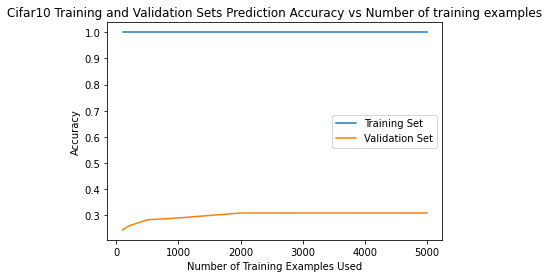

In [37]:
plt.figure()
plt.plot(num_samples, training_accuracy, label = "Training Set")
plt.plot(num_samples, validation_accuracy, label = "Validation Set")
plt.legend()
plt.title("Cifar10 Training and Validation Sets Prediction Accuracy vs Number of training examples")
plt.xlabel("Number of Training Examples Used")
plt.ylabel("Accuracy")

In [41]:
c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [38]:
mnist_train_10000 = mnist_train_features_reshaped[:10000]
mnist_labels_10000 = mnist_train_labels[:10000]
validation_accuracy = []
for c in c_vals:
  classifier = svm.SVC(kernel = "linear", C = c)
  classifier.fit(mnist_train_10000, mnist_labels_10000)
  pred_labels = classifier.predict(mnist_val_features_reshaped)
  score = accuracy_score(mnist_val_labels, pred_labels)
  validation_accuracy.append(score)
validation_accuracy

[0.905, 0.9273, 0.9303, 0.9216, 0.9148, 0.9145, 0.9145, 0.9145]

Text(0, 0.5, 'Validation Accuracy')

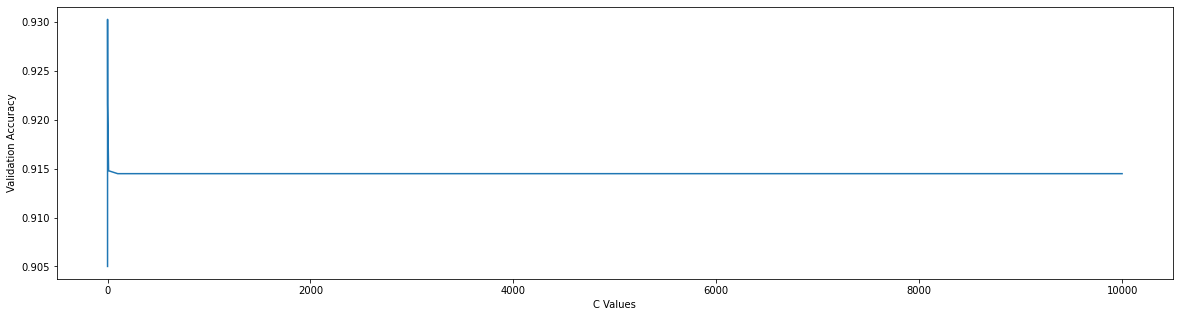

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(c_vals, validation_accuracy)
plt.xlabel("C Values")
plt.ylabel("Validation Accuracy")

In [59]:
set_size = len(spam["training_data"]) // 5
set_size

834

In [60]:
spam_train = np.concatenate((spam_train_features, spam_val_features), axis = 0)
part0_f = spam_train[:set_size]
part1_f = spam_train[set_size : set_size*2]
part2_f = spam_train[set_size*2 : set_size*3]
part3_f = spam_train[set_size*3 : set_size * 4]
part4_f = spam_train[set_size*4 : ]

In [14]:
parts_f = [part0_f, part1_f, part2_f, part3_f, part4_f]

In [61]:
spam_labels = np.concatenate((spam_train_labels, spam_val_labels), axis = None)
part0_l = spam_labels[:set_size]
part1_l = spam_labels[set_size : set_size*2]
part2_l = spam_labels[set_size*2 : set_size*3]
part3_l = spam_labels[set_size*3 : set_size * 4]
part4_l = spam_labels[set_size*4 : ]

In [62]:
parts_l = [part0_l, part1_l, part2_l, part3_l, part4_l]

In [19]:
c_vals = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 100]

In [20]:
val_accuracy_overall = []
for c in c_vals:
  val_accuracy_local = []
  for i in range(5):
    idx = list(range(5)) #idx = [0,1,2,3,4]
    val_idx = idx.pop(i)
    train_set = parts_f[idx[0]] #train_idx contains [1,2,3,4]
    val_set = parts_f[val_idx]
    train_labels = parts_l[idx[0]]
    val_labels = parts_l[val_idx]
    for j in range(1, 4):
      train_set = np.concatenate((train_set, parts_f[j]), axis=0)
      train_labels = np.concatenate((train_labels, parts_l[j]), axis=None)
    classifier = svm.SVC(kernel = "linear", C = c)
    classifier.fit(train_set, train_labels)
    pred_labels = classifier.predict(val_set)
    score = accuracy_score(val_labels, pred_labels)
    val_accuracy_local.append(score)
  val_accuracy_overall.append(np.mean(val_accuracy_local))


In [21]:
val_accuracy_overall

[0.7495186625818964,
 0.7778039769141624,
 0.7914701731437817,
 0.7967448051128475,
 0.8022580978279578,
 0.8024979059814349,
 0.8027382878386286,
 0.8034565648916272,
 0.8034559911879109]

Text(0, 0.5, 'Validation Accuracy')

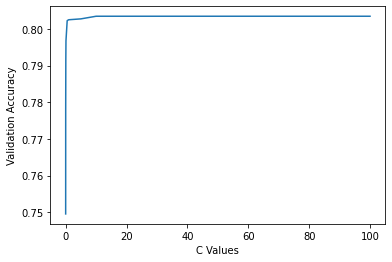

In [22]:
plt.figure()
plt.plot(c_vals, val_accuracy_overall)
plt.xlabel("C Values")
plt.ylabel("Validation Accuracy")

In [25]:
#train model for kaggle competition
mnist_model = svm.SVC(C = 0.1)
mnist_model.fit(mnist["training_data"].reshape((-1, 28 * 28)), mnist["training_labels"])
pred_labels = mnist_model.predict(mnist["test_data"].reshape((-1, 28*28)))
pred_labels

array([0, 6, 0, ..., 3, 2, 4])

In [13]:
import pandas as pd
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')


In [47]:
!python featurize.py

In [ ]:
spam_model = svm.SVC(C = 10)
spam_model.fit(spam["training_data"], spam["training_labels"])
spam_pred_labels = spam_model.predict(spam["test_data"])
spam_pred_labels

In [43]:
results_to_csv(spam_pred_labels)

In [50]:
cifar10_train_features_reshaped = cifar10_train_features.reshape((-1, 3*32*32))

In [51]:
cifar_model = svm.SVC(C = 1)
cifar_model.fit(cifar10_train_features_reshaped[:5000], cifar10_train_labels[:5000])
cifar_pred_labels = cifar_model.predict(cifar10["test_data"].reshape((-1, 3*32*32)))
cifar_pred_labels

array([4, 8, 9, ..., 0, 2, 4])

In [52]:
results_to_csv(cifar_pred_labels)